In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline

np.random.seed(0)

In [6]:
# generate a 2-D OU process where time-varying parameters are specified as an array
def generateOU(N,dt,mean_p,revert,sigma, X_init=None):
    #This method returns a 2-D OU process using the Euler-Maruyama method
    x = np.zeros((N,2))
    if X_init:
        x[0] = X_init
    for i in range(N-1):
        x[i+1]=x[i]+revert[i]*(mean_p[i]-x[i])*dt+math.sqrt(dt)*sigma[i]@np.random.normal(0,1,size=2)
        
    return x

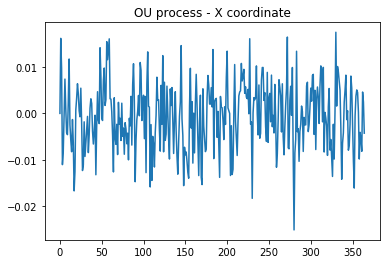

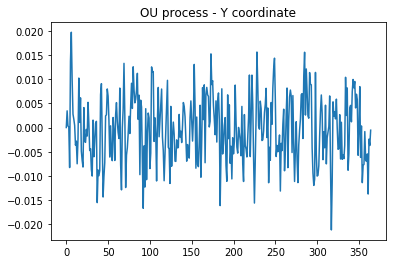

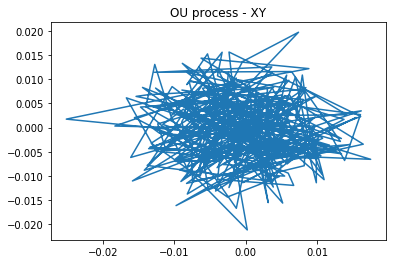

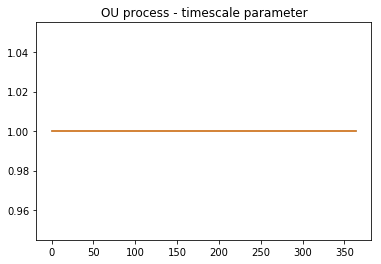

In [7]:
day_steps=10
dt=1.0/day_steps
N=int(365*day_steps) # run for 5 years

sigma=np.zeros((N,2,2))
sigma[:,1,1]=0.01
sigma[:,0,0]=0.01

revert= np.ones((N,2))

# switching
sw = 0.001
rates = np.array([10,0.01])
c_rate = 0
for i in range(N):
    if (i%int(3*30*day_steps))==0: # switch every 6 months
        c_rate=int(not(c_rate))
    revert[i,:]=rates[c_rate]
revert[:,0]=1#np.exp(2*np.sin(np.arange(N)/(0.5*365.)))
revert[:,1]=1#np.exp(2*np.sin(np.arange(N)/(0.5*365.)))
mean_p = np.zeros((N,2))
X=generateOU(N,dt,mean_p,revert,sigma)

T=np.arange(0,N//day_steps)# time


#T=T.reshape(-1,1)


plt.plot(T,X[::day_steps,0])
plt.title('OU process - X coordinate')
plt.show()

plt.plot(T,X[::day_steps,1])
plt.title('OU process - Y coordinate')
plt.show()

plt.plot(X[::day_steps,0],X[::day_steps,1])
plt.title('OU process - XY')
plt.show()

plt.plot(revert[::day_steps]**-1)
plt.title('OU process - timescale parameter')
plt.show()
dataset = pd.DataFrame({'Animal':np.zeros_like(T),
                        'Date':pd.to_datetime(T, unit='D', origin=pd.Timestamp('2018-01-01')),
                        'Time':pd.to_datetime(pd.to_datetime(T, unit='D', origin=pd.Timestamp('2018-01-01')), format='%H:%M').time,
                        'Latitude':X[::day_steps,0],
                        'Longitude':X[::day_steps,1],'Lengthscale':revert[::day_steps,1]**-1})

dataset.to_csv('constant lengthscale.csv')

In [8]:
revert

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [1., 1.]])